Q1.Calculating similarity for categorical data involves using different methods than those used for numerical data. Here are several common approaches:
1. Simple Matching Coefficient (SMC)
This is a basic method to measure similarity between two categorical data points by comparing corresponding categories. If the categories match, it is considered a similarity; otherwise, it is a dissimilarity.
2. Jaccard Index
The Jaccard index is used for binary attributes (yes/no, true/false). It is defined as the size of the intersection divided by the size of the union of the sample sets.
3. Hamming Distance
Hamming distance is used for categorical data by counting the number of positions at which the corresponding categories are different.
4. Goodall Similarity
Goodall similarity focuses on the probability of attribute values occurring together. It considers the relative frequency of attribute values across the dataset.
5. Overlap Measure
This measure is simply the count of matching categories over the total number of categories.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
file_path = '/content/drive/MyDrive/auto_new.csv'


In [136]:
df=pd.read_csv(file_path)

In [137]:
print(df)

     Class         Make Fuel_type Aspiration Num_doors   body_style  \
0        3  alfa-romero       gas        std       two  convertible   
1        3  alfa-romero       gas        std       two  convertible   
2        1  alfa-romero       gas        std       two    hatchback   
3        2         audi       gas        std      four        sedan   
4        2         audi       gas        std      four        sedan   
..     ...          ...       ...        ...       ...          ...   
200     -1        volvo       gas        std      four        sedan   
201     -1        volvo       gas      turbo      four        sedan   
202     -1        volvo       gas        std      four        sedan   
203     -1        volvo    diesel      turbo      four        sedan   
204     -1        volvo       gas      turbo      four        sedan   

    drive_wheels engine_location  wheel_base  length  ...  engine_size  \
0            rwd           front        88.6   168.8  ...          130   

In [138]:
print(df.describe())

            Class  wheel_base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb_height  engine_size  compression _ratio  horsepower    city_mpg  \
count   205.000000   205.000000          205.000000  205.000000  205.000000   
mean   2555.565854   126.907317           10.142537  103.951220   25.219512   
std     520.680204    41.642693            3.972040   39.639028    6.542142   
min    1488.000000    61.000000            7.000000   48.00000

In [139]:
df = df.replace('?', pd.NA)
numeric_columns = ['Class',  'wheel_base', 'length', 'width', 'height',
                   'curb_height', 'engine_size', 'bore', 'stroke', 'compression _ratio',
                   'horsepower', 'peal_rpm', 'city_mpg', 'highway_mpg', 'price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [140]:
categorical_columns = ['Make', 'Fuel_type', 'Aspiration', 'Num_doors', 'body_style',
                       'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders', 'fuel_system']
unique_values_counts = {col: df[col].value_counts() for col in categorical_columns}
for col, counts in unique_values_counts.items():
    print(f"Unique values for {col}:\n{counts}\n")


Unique values for Make:
Make
toyota           32
nissan           18
honda            13
mitsubishi       13
mazda            12
subaru           12
volkswagen       12
peugot           11
volvo            11
mercedes-benz     8
dodge             8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
mercury           1
Name: count, dtype: int64

Unique values for Fuel_type:
Fuel_type
gas       178
diesel     19
Name: count, dtype: int64

Unique values for Aspiration:
Aspiration
std      161
turbo     36
Name: count, dtype: int64

Unique values for Num_doors:
Num_doors
four    113
two      84
Name: count, dtype: int64

Unique values for body_style:
body_style
sedan          94
hatchback      65
wagon          24
hardtop         8
convertible     6
Name: count, dtype: int64

Unique values for drive_wheels:
drive_wheels
fwd    116
rwd     72
4wd      9
Name: coun

In [141]:
df.describe()

,Class,wheel_base,length,width,height,curb_height,engine_size,bore,stroke,compression _ratio,horsepower,peal_rpm,city_mpg,highway_mpg,price
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.791878,98.879188,174.165990,65.913198,53.824365,2561.284264,128.131980,3.329645,3.247513,10.121421,104.365482,5108.121827,25.365482,30.852792,13436.593909
std,1.225717,6.105770,12.492492,2.181772,2.393170,529.971486,41.688628,0.275137,0.312841,3.943426,40.152495,467.990739,6.512032,6.890074,8220.353528
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,25.000000,30.000000,10345.000000
75%,2.000000,102.400000,183.500000,66.900000,55.600000,2954.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.000000,16558.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [142]:
print(df.isnull().sum())

Class                 0
Make                  0
Fuel_type             0
Aspiration            0
Num_doors             0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_height           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression _ratio    0
horsepower            0
peal_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64


In [143]:
#Selecting features for clustering
features = df[['wheel_base', 'length', 'width', 'height', 'curb_height', 'engine_size', 'bore', 'stroke',
               'compression _ratio', 'horsepower', 'peal_rpm', 'city_mpg', 'highway_mpg', 'price']]

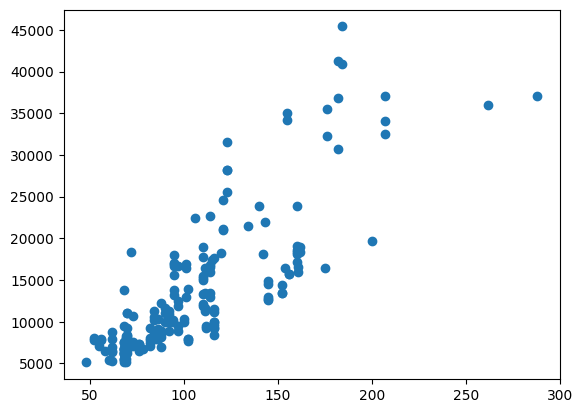

This is very bad for analysis process so we will analyse the car by cluster.


In [144]:
plt.scatter(df['horsepower'],df['price'])
plt.show()
print("This is very bad for analysis process so we will analyse the car by cluster.")

In [145]:
non_numeric_values = df[['horsepower', 'price']].applymap(lambda x: pd.isna(pd.to_numeric(x, errors='ignore')))

# Print the number of non-numeric values in each column
print(non_numeric_values.sum())

horsepower    0
price         0
dtype: int64


In [146]:

km=KMeans(n_clusters=5)


print(km)

KMeans(n_clusters=5)


In [147]:
Y=km.fit_predict(df[['horsepower','price']])
print(Y)

[3 2 2 3 2 2 2 2 4 4 2 2 4 4 4 1 1 1 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 3 3 3 0 3 3 3 1 1 1 0 0 0 0 0 0 0 3 3 3 2 2 4 4 4 1 1 1 1 1 2 0 0 0 0
 3 0 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 2 3 2 2 2 3 3 3 3 2 2 2 2 2 2
 2 0 0 0 0 0 0 3 4 1 1 1 1 3 3 2 2 2 2 0 0 0 0 0 3 0 3 0 3 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 3 2 0 3 3 3 3 2 2 2 2 0 0 0 0 0 3 3 3 3 3 3
 3 3 3 2 2 2 2 2 2 4 4 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     Class         Make Fuel_type Aspiration Num_doors   body_style  \
0        3  alfa-romero       gas        std       two  convertible   
1        3  alfa-romero       gas        std       two  convertible   
2        1  alfa-romero       gas        std       two    hatchback   
3        2         audi       gas        std      four        sedan   
4        2         audi       gas        std      four        sedan   
..     ...          ...       ...        ...       ...          ...   
200     -1        volvo       gas        std      four        sedan   
201     -1        volvo       gas      turbo      four        sedan   
202     -1        volvo       gas        std      four        sedan   
203     -1        volvo    diesel      turbo      four        sedan   
204     -1        volvo       gas      turbo      four        sedan   

    drive_wheels engine_location  wheel_base  length  ...  fuel_system  bore  \
0            rwd           front        88.6   168.8  ...         m

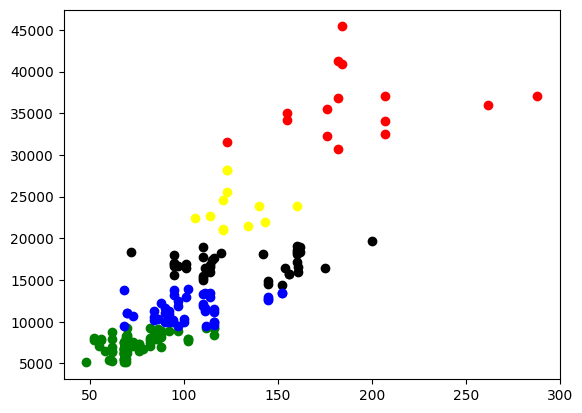

In [148]:
df["Cluster"]=Y
print(df)
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]
df3=df[df.Cluster==3]
df4=df[df.Cluster==4]
print(df0)
print(df1)
print(df2)
print(df3)
print(df4)
plt.scatter(df0.horsepower,df0.price,color='green')
plt.scatter(df1.horsepower,df1.price,color='red')
plt.scatter(df2.horsepower,df2.price,color='black')
plt.scatter(df3.horsepower,df3.price,color='blue')
plt.scatter(df4.horsepower,df4.price,color='yellow')
plt.show()

[[   75.          7395.74117647]
 [  191.33333333 36037.8       ]
 [  130.02564103 16963.87179487]
 [  102.5        11548.89130435]
 [  127.41666667 23747.        ]]
lloyd


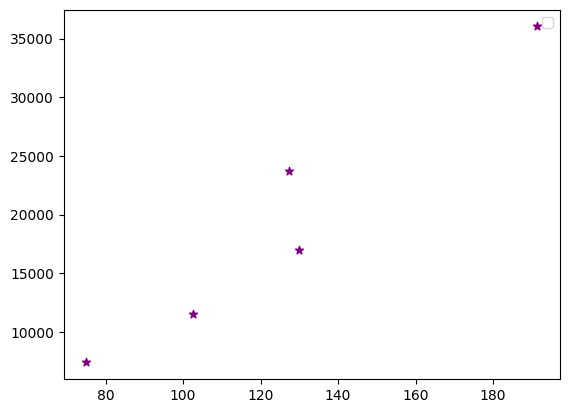

In [149]:
print(km.cluster_centers_)
print(km.algorithm)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker="*")
plt.legend()
plt.show()

Business Insights-
1. Customer Segmentation:
Cluster 0: Customers interested in high-end, luxury cars.
Cluster 1,2,3: Budget-conscious customers looking for affordable and efficient cars.
Cluster 4: Customers preferring mid-range cars with balanced features.

2. Product Development:
Focus on developing new models catering to the specific needs of each cluster.
High-end features for Cluster 0, economical and efficient features for Cluster 1,2,3, and balanced features for Cluster 4.


In [152]:
print("CLUSTER SUMMARY")
cluster_summary = df.groupby("Cluster").agg(["count", "min", "max"])
print(cluster_summary)

CLUSTER SUMMARY
        Class          Make                          Fuel_type               \
        count min max count          min         max     count     min  max   
Cluster                                                                       
0          85  -1   3    85    chevrolet  volkswagen        85  diesel  gas   
1          15  -1   3    15          bmw     porsche        15  diesel  gas   
2          39  -2   3    39  alfa-romero       volvo        39  diesel  gas   
3          46  -2   3    46  alfa-romero       volvo        46  diesel  gas   
4          12  -1   3    12         audi       volvo        12  diesel  gas   

        Aspiration  ... peal_rpm city_mpg         highway_mpg         price  \
             count  ...      max    count min max       count min max count   
Cluster             ...                                                       
0               85  ...   6600.0       85  23  49          85  25  54    85   
1               15  ...   5900.0   

In [163]:
# Example new car data (you can change these values)
print("Now we will predict the class of the car according to its horsepower and price.")
user_input = input("Enter two values separated by a comma: ")
horsepower, price = user_input.split(",")
horsepower = int(horsepower)
price = int(price)
new_car = [horsepower, price]

# Predict the cluster
predicted_cluster = km.predict(np.array(new_car).reshape(-1, 2))
print(f'The predicted cluster for the new car is: {predicted_cluster[0]}')


Now we will predict the class of the car according to its horsepower and price.
Enter two values separated by a comma: 154,16500
The predicted cluster for the new car is: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
